In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=["sepal_length","sepal_width","petal_length","petal_width","class"])
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.to_csv("Iris-For-KNN")

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [6]:
iris["sepal_length"].nunique()

35

In [7]:
#To check if there are any missing values
for col in iris:
    print(col,": \n",iris[col].unique(),"\n")

sepal_length : 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9] 

sepal_width : 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6] 

petal_length : 
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2] 

petal_width : 
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3] 

class : 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



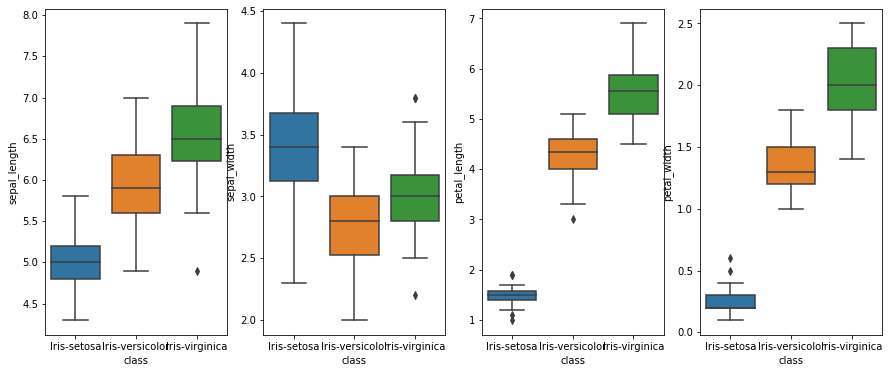

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
sns.boxplot(ax=axes[0],data=iris,x="class",y='sepal_length')
sns.boxplot(ax=axes[1],data=iris,x="class",y='sepal_width')
sns.boxplot(ax=axes[2],data=iris,x="class",y='petal_length')
sns.boxplot(ax=axes[3],data=iris,x="class",y='petal_width')
plt.show()

In [8]:
outlier_sepal_length= iris[iris["class"]=="Iris-virginica"]["sepal_length"]<5  # outlier index=106
outlier_sepal_width_low= iris[iris["class"]=="Iris-virginica"]["sepal_width"]<2.5   # outlier index=119
outlier_sepal_width_high= iris[iris["class"]=="Iris-virginica"]["sepal_width"]>3.7  # outlier index=117,131

outlier_petal_length_low= iris[iris["class"]=="Iris-setosa"]["petal_length"]<1.2  # outlier index=13,22
outlier_petal_length_high= iris[iris["class"]=="Iris-setosa"]["petal_length"]>1.8  # outlier index=24,44

outlier_petal_length_high_versicolor= iris[iris["class"]=="Iris-versicolor"]["petal_length"]<3.2  # outlier index=98

outlier_petal_width = iris[iris["class"]=="Iris-setosa"]["petal_width"]>0.4  # outlier index=23,43


In [9]:
outlier_sepal_length

100    False
101    False
102    False
103    False
104    False
105    False
106     True
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, dtype: bool

In [10]:
iris.drop(index=[106,119,117,131,13,22,24,44,98,23,43],inplace=True,axis=0)

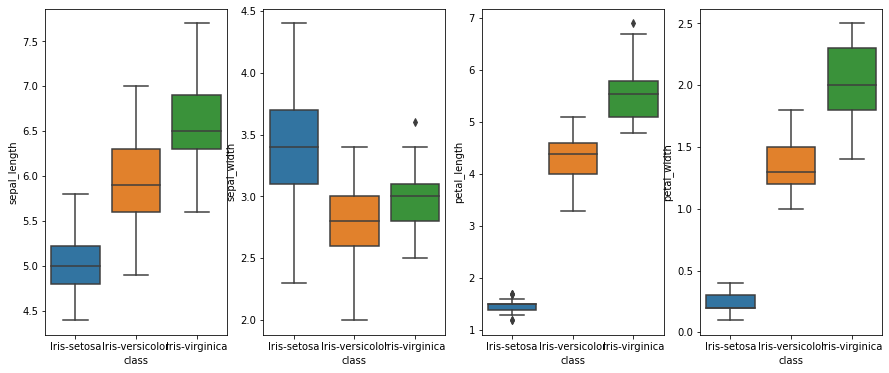

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
sns.boxplot(ax=axes[0],data=iris,x="class",y='sepal_length')
sns.boxplot(ax=axes[1],data=iris,x="class",y='sepal_width')
sns.boxplot(ax=axes[2],data=iris,x="class",y='petal_length')
sns.boxplot(ax=axes[3],data=iris,x="class",y='petal_width')
plt.show()

In [12]:
outlier_sepal_width_high= iris[iris["class"]=="Iris-virginica"]["sepal_width"]>3.5 # outlier index=109

In [13]:
sepal_width_mean= round(iris[iris["class"]=="Iris-virginica"]["sepal_width"].mean(),ndigits=1)
sepal_width_mean

3.0

In [14]:
#Mean imputation

In [15]:
iris.loc[109,"sepal_width"]=sepal_width_mean

In [16]:
iris.loc[109,"sepal_width"]

3.0

In [17]:
outlier_petal_length= iris[iris["class"]=="Iris-setosa"]["petal_length"]>=1.7  # outlier index=5,18,20


In [18]:
petal_length_mean=round(iris[iris["class"]=="Iris-setosa"]["petal_length"].mean(),ndigits=1)
petal_length_mean
iris.loc[5,"petal_length"]=petal_length_mean

In [19]:
iris.loc[5,"petal_length"]

1.5

In [20]:
iris.loc[18,"petal_length"]=petal_length_mean
iris.loc[20,"petal_length"]=petal_length_mean

In [21]:
outlier_petal_length= iris[iris["class"]=="Iris-setosa"]["petal_length"]<1.3 #14, 35
iris.loc[14,"petal_length"]=petal_length_mean
iris.loc[35,"petal_length"]=petal_length_mean

In [22]:
#Mean Imputation
outlier_petal_length= iris[iris["class"]=="Iris-virginica"]["petal_length"]>=6.8  #118
outlier_petal_length
petal_length_mean_virginica=round(iris[iris["class"]=="Iris-virginica"]["petal_length"].mean(),ndigits=1)
petal_length_mean_virginica
iris.loc[118,"petal_length"]=petal_length_mean_virginica

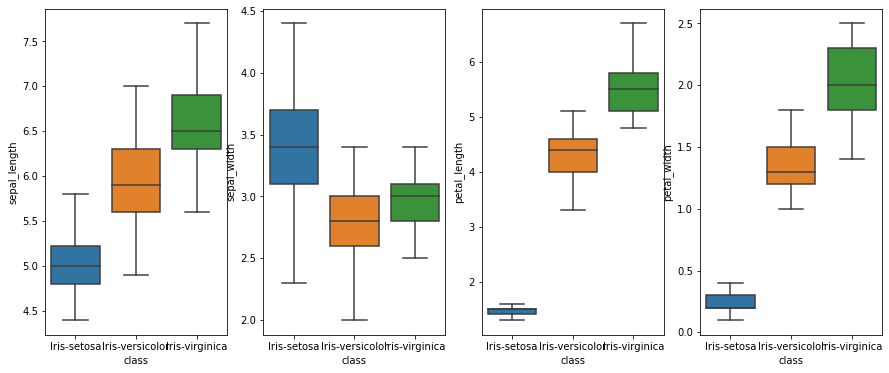

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
sns.boxplot(ax=axes[0],data=iris,x="class",y='sepal_length')
sns.boxplot(ax=axes[1],data=iris,x="class",y='sepal_width')
sns.boxplot(ax=axes[2],data=iris,x="class",y='petal_length')
sns.boxplot(ax=axes[3],data=iris,x="class",y='petal_width')
plt.show()

In [24]:

iris_backup=iris.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()

In [26]:
iris["class"]=Oe.fit_transform(iris[["class"]])

In [27]:
iris.head(100)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
102,7.1,3.0,5.9,2.1,2.0
103,6.3,2.9,5.6,1.8,2.0
104,6.5,3.0,5.8,2.2,2.0
105,7.6,3.0,6.6,2.1,2.0


In [28]:
from scipy.stats import skew

for col in iris:
    print(col,"\n: ",round(skew(iris[col]),ndigits=2),"\n")


sepal_length 
:  0.2 

sepal_width 
:  0.45 

petal_length 
:  -0.38 

petal_width 
:  -0.14 

class 
:  -0.03 



In [29]:
iris.corr().style.background_gradient()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.181554,0.863701,0.821492,0.792637
sepal_width,-0.181554,1.000000,-0.474548,-0.395114,-0.442897
petal_length,0.863701,-0.474548,1.000000,0.962185,0.950253
petal_width,0.821492,-0.395114,0.962185,1.000000,0.957589
class,0.792637,-0.442897,0.950253,0.957589,1.000000


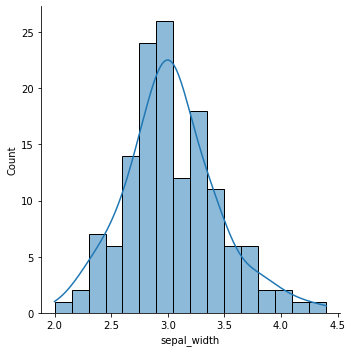

In [30]:
#backup
iris_backup1=iris.copy()
sns.displot(iris["sepal_width"],kde=True);

In [31]:
iris_backup1["class"]=iris_backup1["class"].astype("int64")
iris_backup1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  139 non-null    float64
 1   sepal_width   139 non-null    float64
 2   petal_length  139 non-null    float64
 3   petal_width   139 non-null    float64
 4   class         139 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.6 KB


In [32]:
X=iris_backup1.iloc[:,:4]
Y=iris_backup1.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 139, dtype: int64

In [33]:
#scaling

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [34]:
iris_ft=SS.fit_transform(X)
iris_Scaled=pd.DataFrame(iris_ft,columns=["sepal_length","sepal_width","petal_length","petal_width"])

In [35]:
iris_Scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.979057,1.115393,-1.398736,-1.341473
1,-1.233192,-0.088331,-1.398736,-1.341473
2,-1.487326,0.393159,-1.457122,-1.341473
3,-1.614393,0.152414,-1.340351,-1.341473
4,-1.106124,1.356137,-1.398736,-1.341473
...,...,...,...,...
134,1.054018,-0.088331,0.819920,1.425848
135,0.545749,-1.292054,0.703149,0.898739
136,0.799883,-0.088331,0.819920,1.030516
137,0.418682,0.874648,0.936691,1.425848


In [36]:
for col in iris_Scaled:
    print(col,"\n: ",round(skew(iris_Scaled[col]),ndigits=2),"\n")

sepal_length 
:  0.2 

sepal_width 
:  0.45 

petal_length 
:  -0.38 

petal_width 
:  -0.14 



In [37]:
iris_Scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02
mean,2.853932e-16,1.829072e-16,4.632585e-17,7.507983e-17
std,1.003617e+00,1.003617e+00,1.003617e+00,1.003617e+00
min,-1.868528e+00,-2.495778e+00,-1.457122e+00,-1.473250e+00
25%,-8.519900e-01,-5.698202e-01,-1.340351e+00,-1.209696e+00
50%,-8.958694e-02,-8.833079e-02,3.528344e-01,1.080762e-01
75%,6.728162e-01,3.931586e-01,7.615343e-01,7.669621e-01
max,2.324690e+00,3.282095e+00,1.695705e+00,1.689402e+00


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.30,random_state=1)

In [39]:
#Training the model

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [40]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [41]:
ypredict=KNN.predict(xtest)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
ac=accuracy_score(ytest,ypredict)
cm=confusion_matrix(ytest,ypredict)
cr=classification_report(ytest,ypredict)

print(f"Accuracy-: {ac}\n {cm}\n {cr}")

Accuracy-: 0.9761904761904762
 [[16  0  0]
 [ 0 14  1]
 [ 0  0 11]]
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42



In [45]:
#Using Suport vector machine

from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
train_score=svm.score(xtrain,ytrain)
test_score=svm.score(xtest,ytest)
print(f"Training acc: {train_score}\n Testing acc: {test_score}")

Training acc: 0.9690721649484536
 Testing acc: 0.9761904761904762


In [53]:
ypred=svm.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy",ac,"\n",cr,"\n\n",cm)

Accuracy 0.9761904761904762 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42
 

 [[16  0  0]
 [ 0 14  1]
 [ 0  0 11]]


In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [55]:
lr.fit(xtrain,ytrain)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
train_score=svm.score(xtrain,ytrain)
test_score=svm.score(xtest,ytest)
print(f"Training acc: {train_score}\n Testing acc: {test_score}")

Training acc: 0.9690721649484536
 Testing acc: 0.9761904761904762


In [57]:
ypred=svm.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy",ac,"\n",cr,"\n\n",cm)

Accuracy 0.9761904761904762 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42
 

 [[16  0  0]
 [ 0 14  1]
 [ 0  0 11]]
